In [160]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [161]:
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import burst_func as bf
import plot_func as pf

# Plot RFs for Given Seed and Iteration Number

In [162]:
ngrid = 20

xs,ys = np.meshgrid(np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid),np.linspace(0.5/ngrid,1-0.5/ngrid,ngrid))
xs,ys = xs.flatten(),ys.flatten()

in_rf = np.sqrt((xs-0.5)**2 + (ys-0.5)**2) < 0.5/np.sqrt(2)
xs,ys = xs[in_rf],ys[in_rf]
n_in_rf = len(xs)

x_idxs = np.round((xs - np.min(xs))*ngrid).astype(int)
y_idxs = np.round((ys - np.min(ys))*ngrid).astype(int)

nrf = np.max(x_idxs)+1

In [163]:
reload(pf)

def plot_rfs(seed,n_iter):        
        
    fig,axs = plt.subplots(5, 4, figsize=(16,15), dpi=150)
    
    axs = axs.flatten()
    e_axs = axs[:16]
    i_axs = axs[16:]
    if n_iter >= 0:
        with open('./../results/sim_lgn_wave_rfs_ne=16_ni=4/' +\
            'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
            res_dict = pickle.load(handle)
        
        wen = res_dict['wex'][:,:n_in_rf]
        wef = res_dict['wex'][:,n_in_rf:]
        win = res_dict['wix'][:,:n_in_rf]
        wif = res_dict['wix'][:,n_in_rf:]
    else:
        rng = np.random.default_rng(seed)
        wex = rng.uniform(0.4,0.6,size=(16,2*n_in_rf))
        wix = rng.uniform(0.4,0.6,size=(4,2*n_in_rf))
        
        wex *= 1.0 / np.sum(wex,axis=1,keepdims=True)
        wix *= 1.0 / np.sum(wix,axis=1,keepdims=True)
        
        wen = wex[:,:n_in_rf]
        wef = wex[:,n_in_rf:]
        win = wix[:,:n_in_rf]
        wif = wix[:,n_in_rf:]
        
    max_we = np.max(np.concatenate([wen.flatten(),wef.flatten()]))#2*np.mean(np.concatenate([wen.flatten(),wef.flatten()]))
    max_wi = np.max(np.concatenate([win.flatten(),wif.flatten()]))#2*np.mean(np.concatenate([win.flatten(),wif.flatten()]))
    
    for i in range(16):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = wen[i]
        this_wf[x_idxs,y_idxs] = wef[i]
        # pf.contourbar(fig,e_axs[i],this_wn-this_wf,cmap='RdBu',
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        pf.doubimshbar(fig,e_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_we,vmax=max_we,origin='lower')
        pf.doubcont(fig,e_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_we,max_we,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        
    for i in range(4):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = win[i]
        this_wf[x_idxs,y_idxs] = wif[i]
        pf.doubimshbar(fig,i_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_wi,vmax=max_wi,origin='lower')
        pf.doubcont(fig,i_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_wi,max_wi,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_wi,max_wi,13),linewidths=0.8,origin='lower')

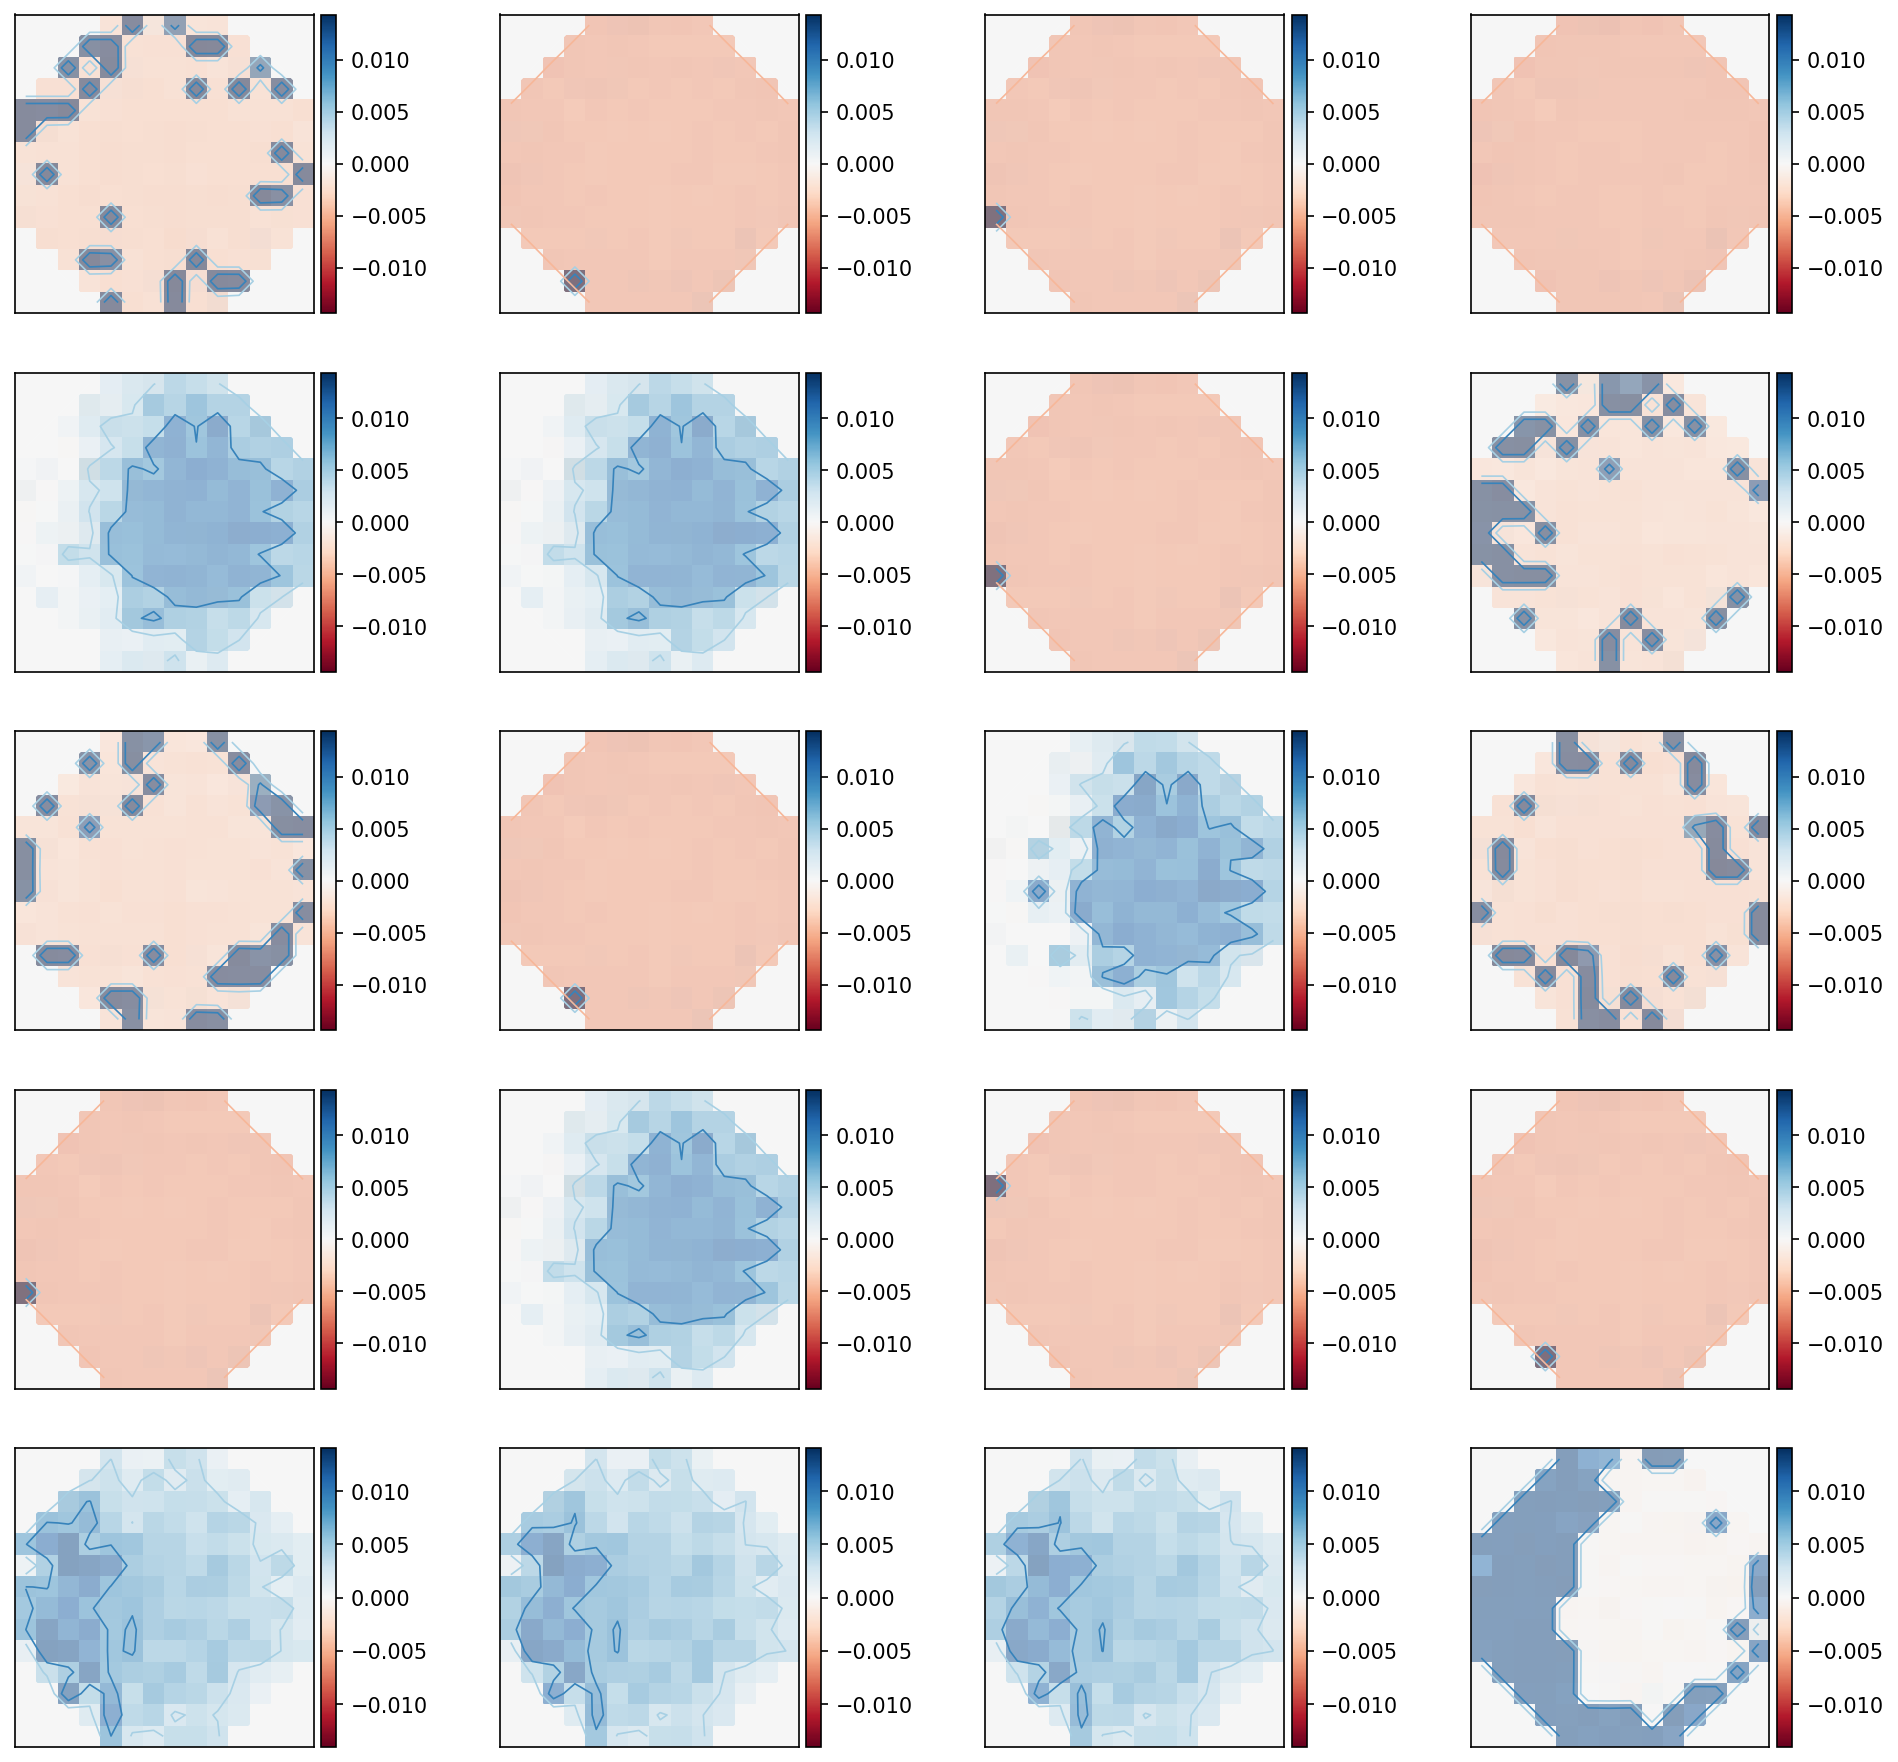

In [217]:
plot_rfs(0,49)

# Look at Results with Varied Inh Gains and WII Constraint

In [174]:
reload(pf)

def plot_cluster_rfs(seed,n_iter,gain_e,gain_i,wii_sum,hebb_wii):        
        
    fig,axs = plt.subplots(5, 4, figsize=(16,15), dpi=150)
    
    axs = axs.flatten()
    e_axs = axs[:16]
    i_axs = axs[16:]
    if n_iter >= 0:
        with open('./../results/sim_lgn_wave_rfs_ne=16_ni=4_ge={:.1f}_gi={:.1f}_wii={:.2f}_hii{:d}/'.format(
            gain_e,gain_i,wii_sum,hebb_wii) +\
            'seed={:d}_iter={:d}.pkl'.format(seed,n_iter), 'rb') as handle:
            res_dict = pickle.load(handle)
        
        wen = res_dict['wex'][:,:n_in_rf]
        wef = res_dict['wex'][:,n_in_rf:]
        win = res_dict['wix'][:,:n_in_rf]
        wif = res_dict['wix'][:,n_in_rf:]
    else:
        rng = np.random.default_rng(seed)
        wex = rng.uniform(0.4,0.6,size=(16,2*n_in_rf))
        wix = rng.uniform(0.4,0.6,size=(4,2*n_in_rf))
        
        wex *= 1.0 / np.sum(wex,axis=1,keepdims=True)
        wix *= 1.0 / np.sum(wix,axis=1,keepdims=True)
        
        wen = wex[:,:n_in_rf]
        wef = wex[:,n_in_rf:]
        win = wix[:,:n_in_rf]
        wif = wix[:,n_in_rf:]
        
    max_we = np.max(np.concatenate([wen.flatten(),wef.flatten()]))#2*np.mean(np.concatenate([wen.flatten(),wef.flatten()]))
    max_wi = np.max(np.concatenate([win.flatten(),wif.flatten()]))#2*np.mean(np.concatenate([win.flatten(),wif.flatten()]))
    
    for i in range(16):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = wen[i]
        this_wf[x_idxs,y_idxs] = wef[i]
        # pf.contourbar(fig,e_axs[i],this_wn-this_wf,cmap='RdBu',
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        pf.doubimshbar(fig,e_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_we,vmax=max_we,origin='lower')
        pf.doubcont(fig,e_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_we,max_we,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_we,max_we,13),linewidths=0.8,origin='lower')
        
    for i in range(4):
        this_wn = np.zeros((nrf,nrf))
        this_wf = np.zeros((nrf,nrf))
        this_wn[x_idxs,y_idxs] = win[i]
        this_wf[x_idxs,y_idxs] = wif[i]
        pf.doubimshbar(fig,i_axs[i],this_wn,-this_wf,cmap_name='RdBu',
            vmin=-max_wi,vmax=max_wi,origin='lower')
        pf.doubcont(fig,i_axs[i],this_wn,-this_wf,cmap='RdBu',
            levels=np.linspace(-max_wi,max_wi,7),linewidths=0.8,origin='lower')
        # levels=np.linspace(-max_wi,max_wi,13),linewidths=0.8,origin='lower')

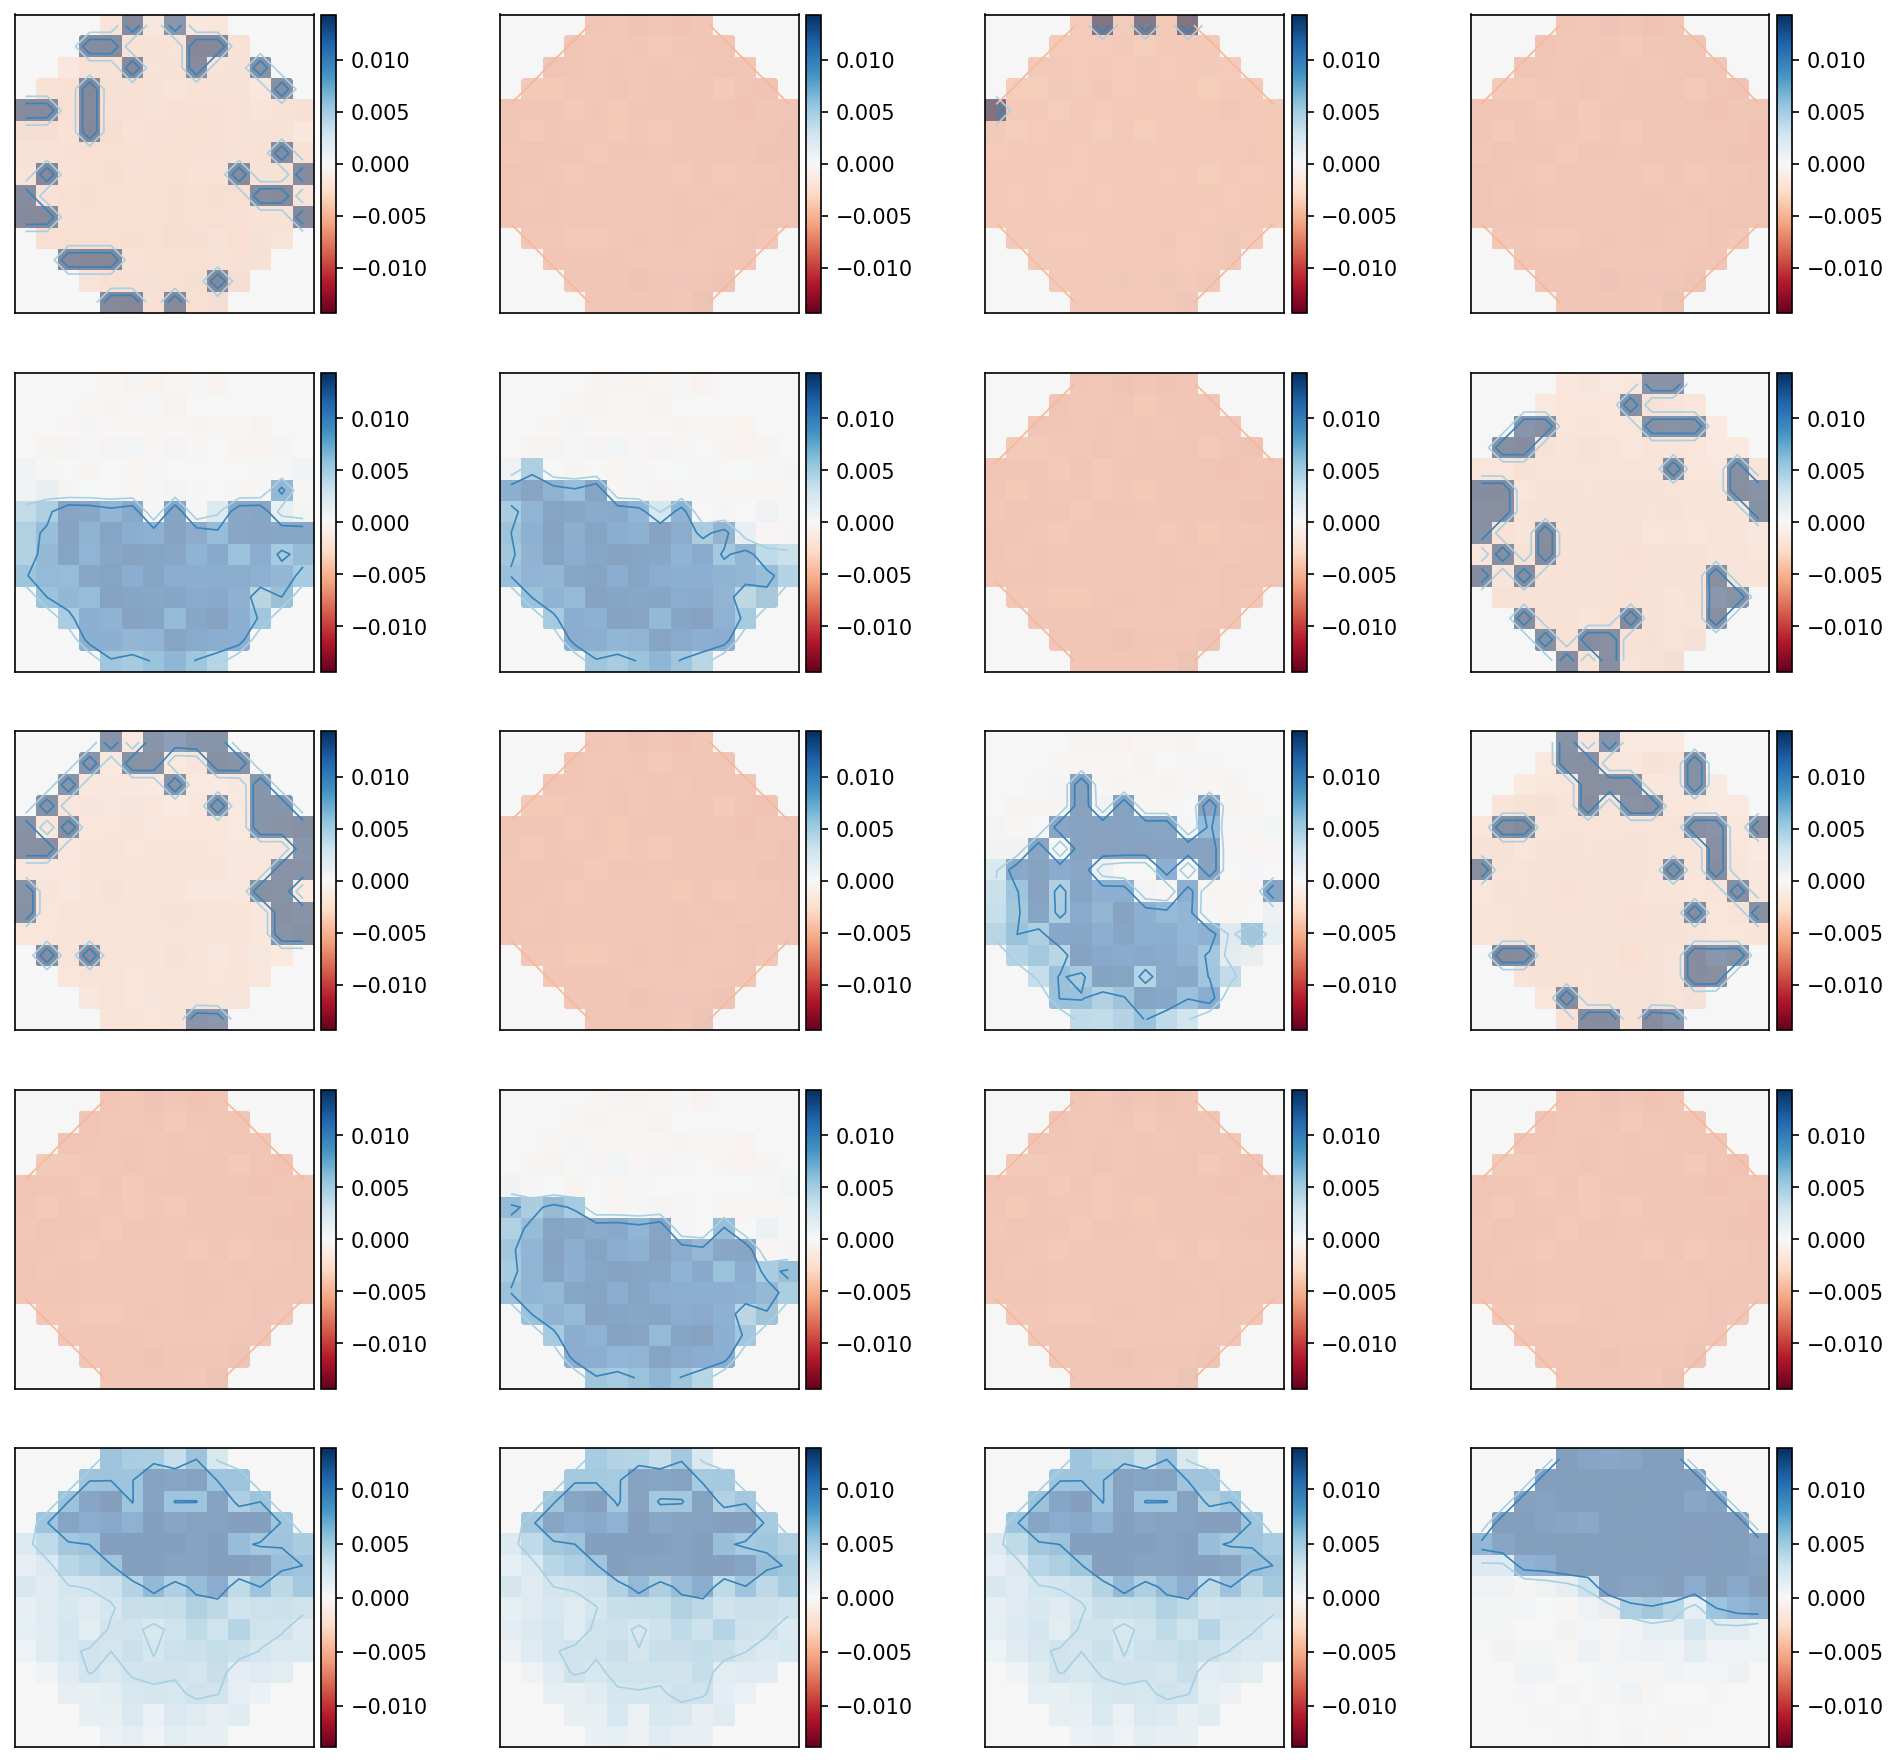

In [176]:
plot_cluster_rfs(0,99,1.0,2.0,0.25,0)

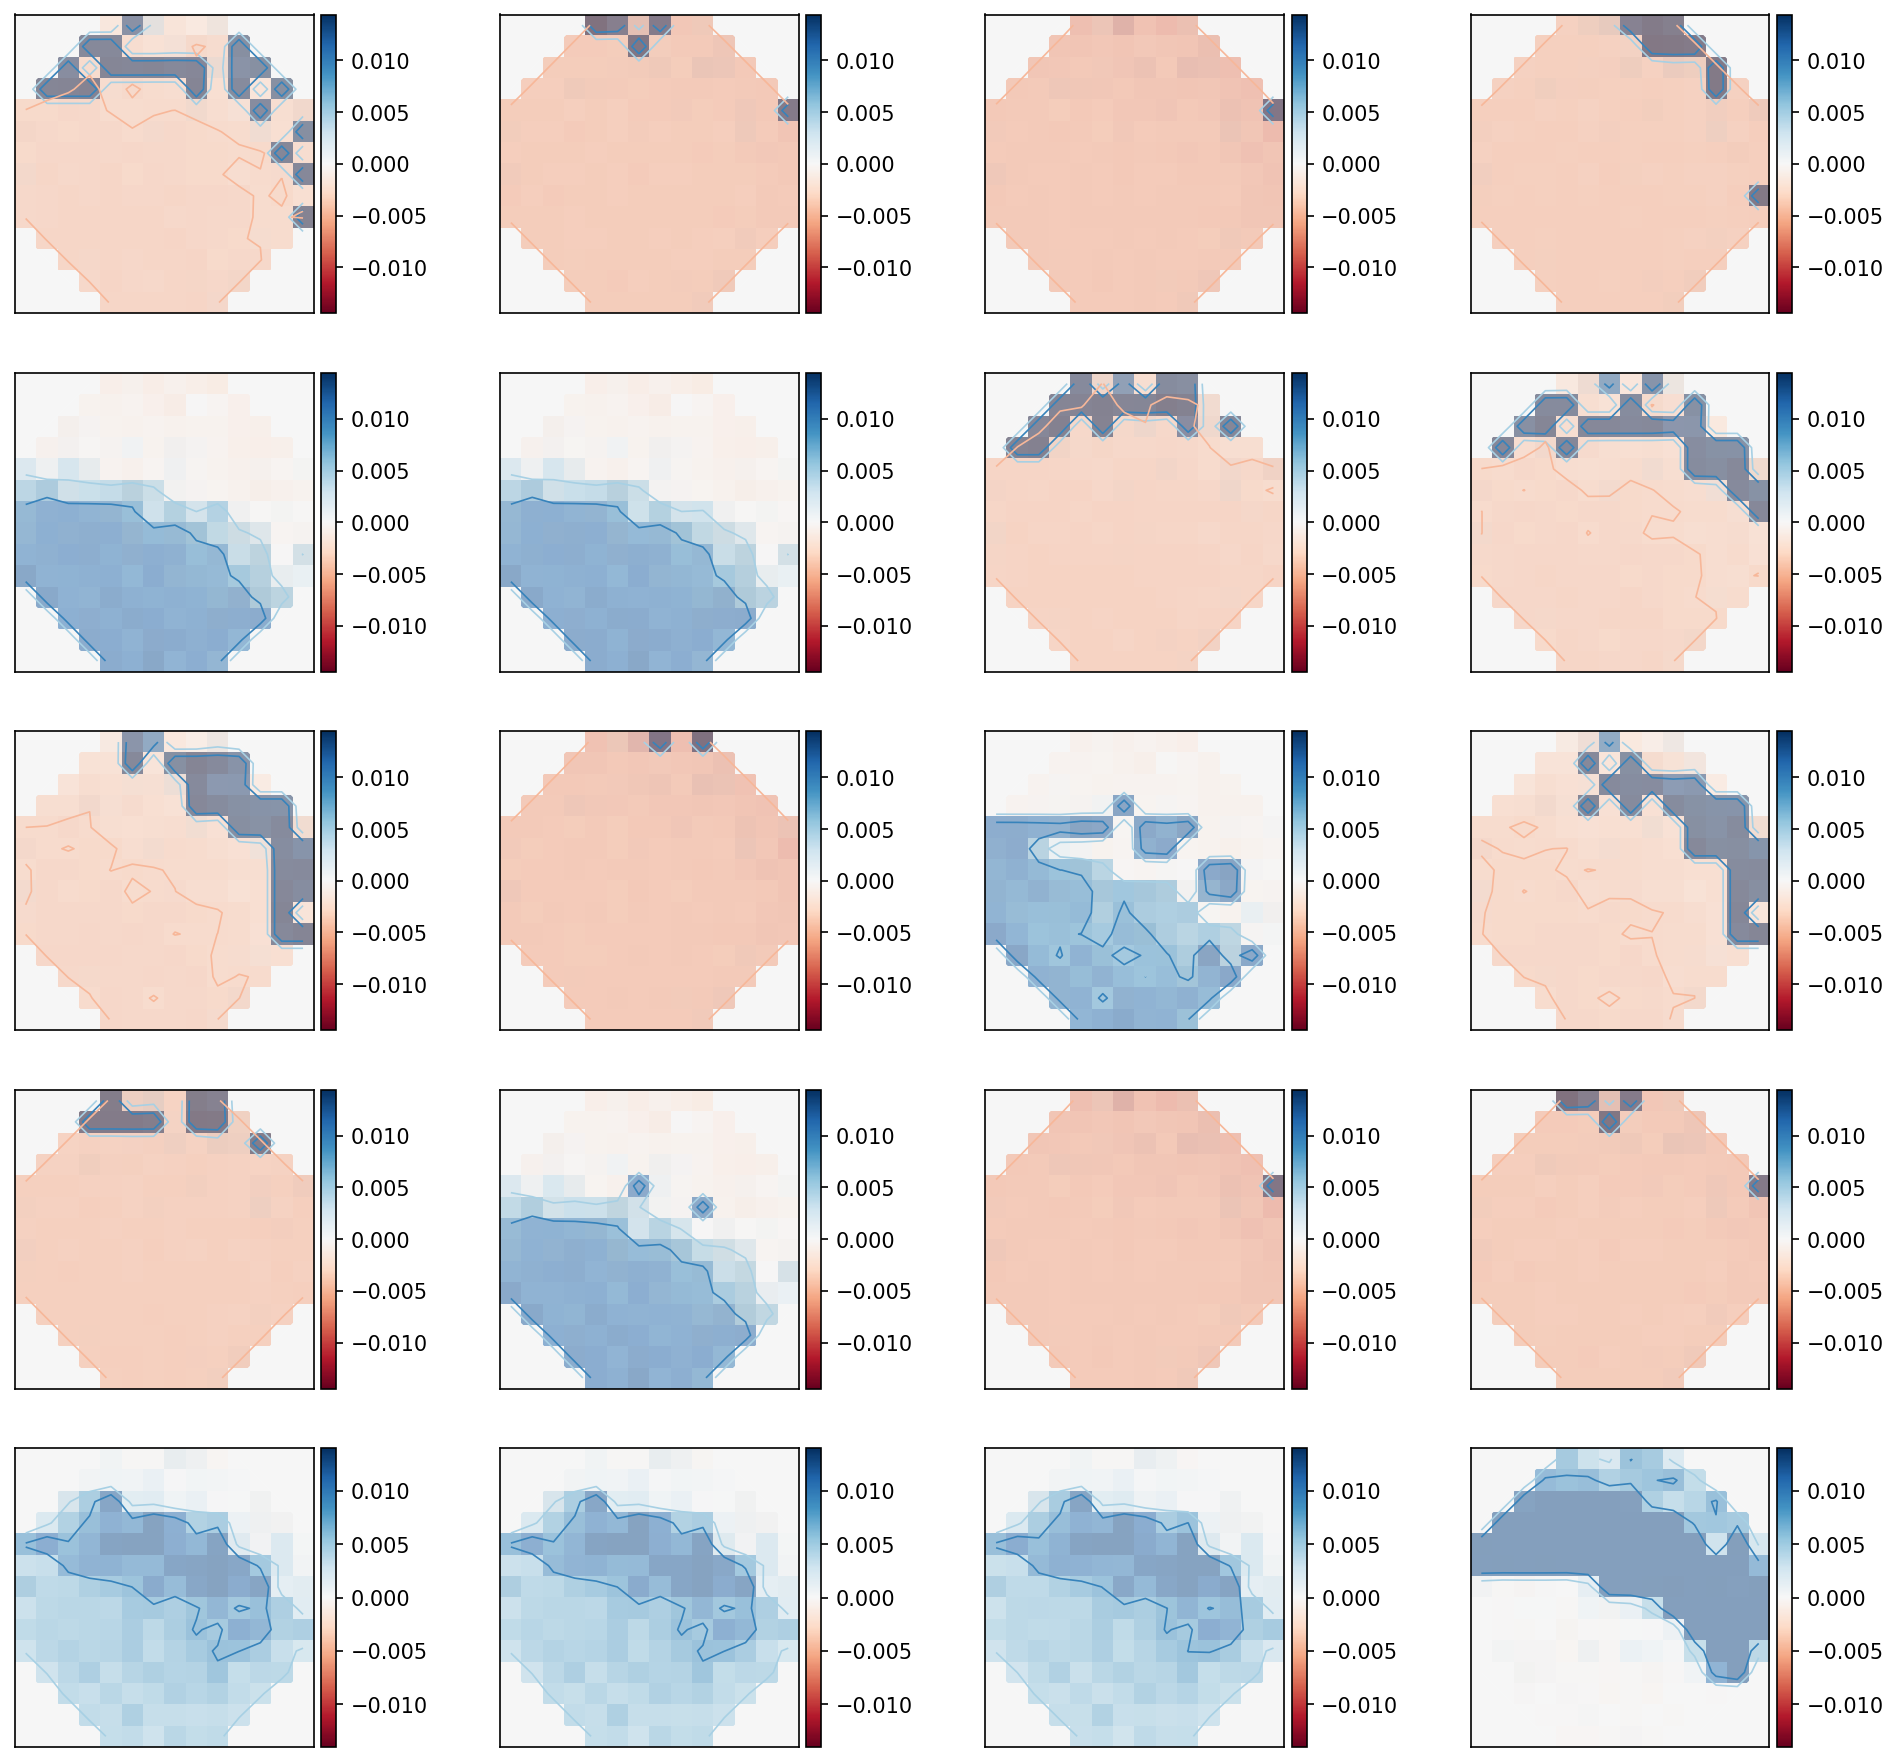

In [187]:
plot_cluster_rfs(0,99,1.0,2.5,0.25,0)

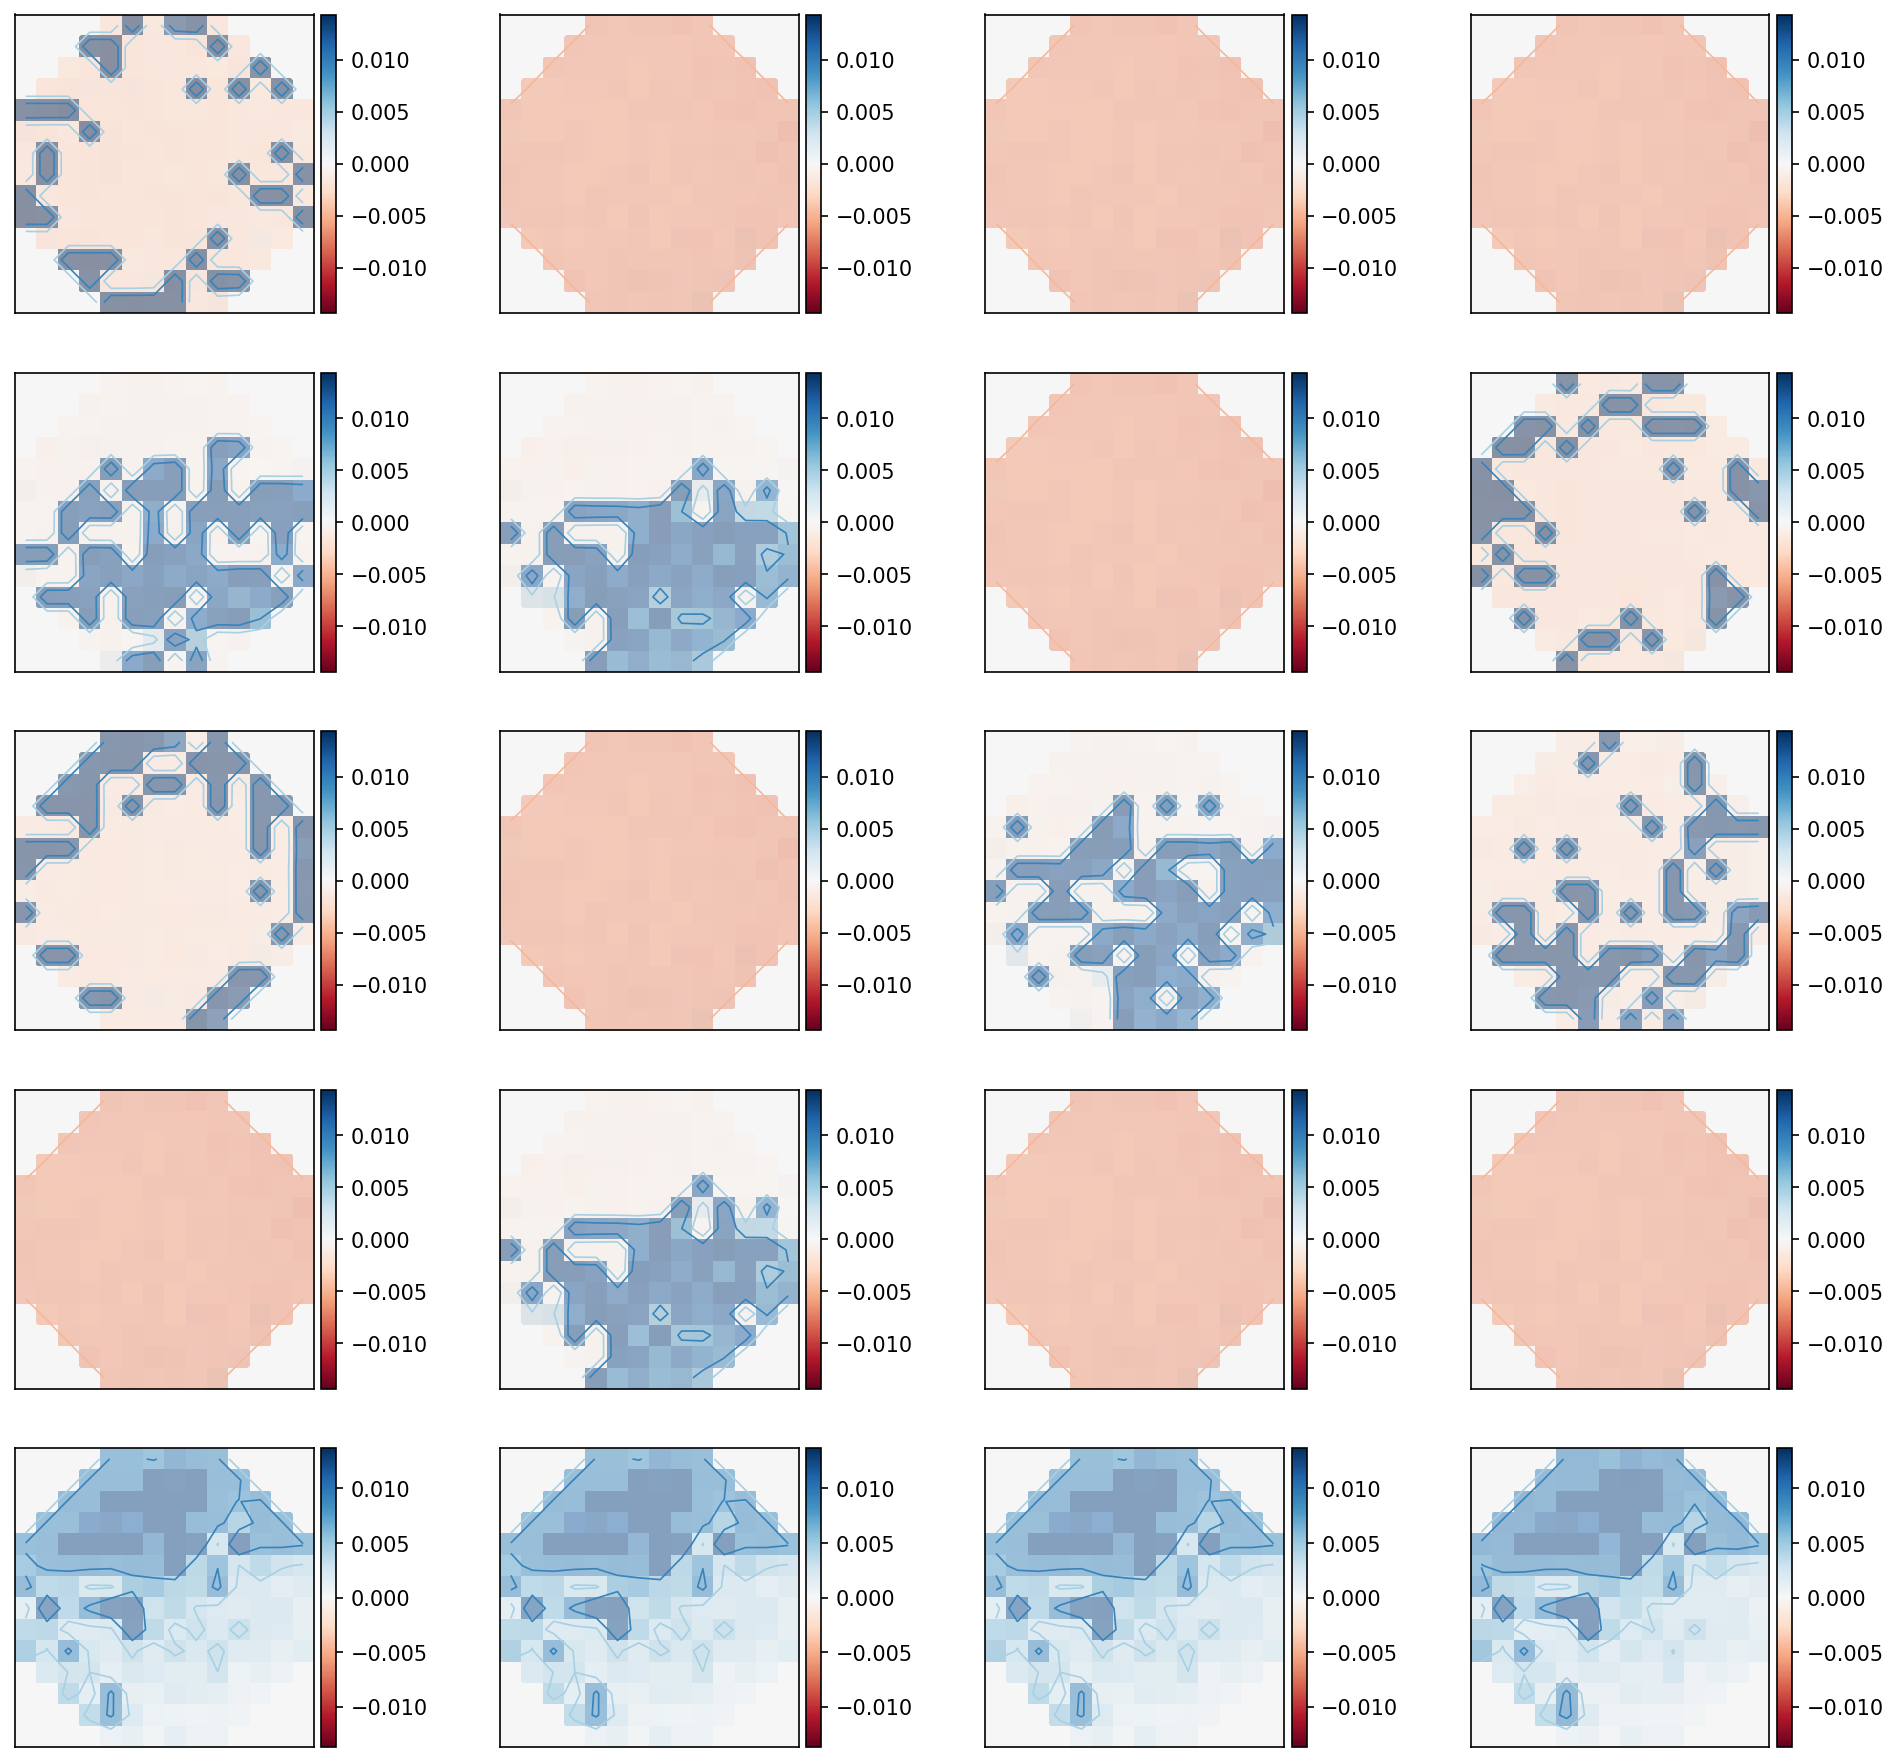

In [199]:
plot_cluster_rfs(0,49,1.0,2.5,0.25,1)

In [ ]:
plot_cluster_rfs(0,100,1.0,2.0,1.0)

In [ ]:
plot_cluster_rfs(0,50,1.0,5.0,1.0)